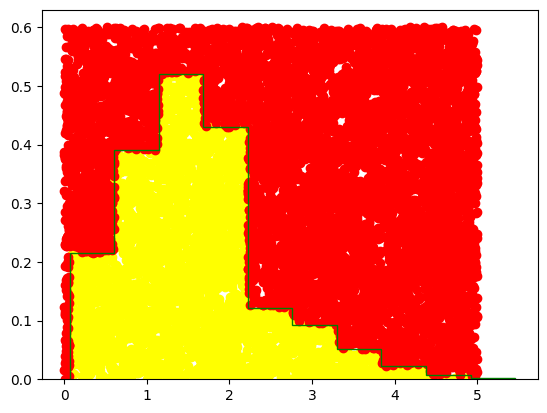

(array([0.21486943, 0.39106421, 0.51980067, 0.42964619, 0.12171304,
        0.09317492, 0.05142413, 0.0223857 , 0.00761633, 0.0014269 ]),
 array([0.0645    , 0.60413003, 1.14376009, 1.68339002, 2.22302008,
        2.76265001, 3.30228019, 3.84191012, 4.3815403 , 4.92117023,
        5.46080017]),
 [<matplotlib.patches.Polygon at 0x21d6fb13650>])

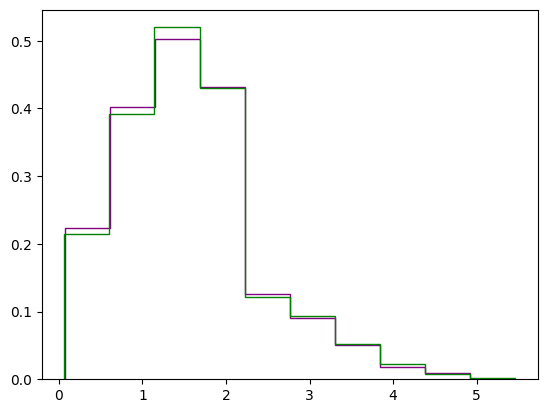

In [78]:
#rejection sampling
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from astroML.datasets import fetch_dr7_quasar


data = fetch_dr7_quasar()
data = data[:100000]

z = data['redshift']


N=10000      #should be greater than data(?) no

plt.hist(z, density=True, histtype='step', color='green')

hist = np.histogram(z)      #convert to histogram
hist_dist = scipy.stats.rv_histogram(hist, density=True)        #get histogram distribution


ymax = 0.6
x = np.random.uniform(0,5,N)
y = np.random.uniform(0,ymax,N)


plt.scatter(x[y<hist_dist.pdf(x)],y[y<hist_dist.pdf(x)],c='yellow')
plt.scatter(x[y>hist_dist.pdf(x)],y[y>hist_dist.pdf(x)],c='red')

plt.show()
goodpoints = x[y<hist_dist.pdf(x)]      #check which point is under the distribution

plt.hist(goodpoints,bins=9,density=True,histtype='step',color='purple')
plt.hist(z, density=True, histtype='step', color='green')